# Heart Attacks

Data source: https://www.kaggle.com/johnsmith88/heart-disease-dataset

Attempting to 
 - build a classification model to predict if a patient has heart disease
 - determine which machine learning algorithm models the data best
 - determine which feature in the data is most important in predicting heart disease

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
%matplotlib inline

In [3]:
data = pd.read_csv("data\heart.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [22]:
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['target']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Exploratory Data Analysis

In [31]:
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,54.422741,0.702624,0.966472,131.666181,243.794461,0.153061,0.516035,150.118076,0.326531,1.027259,1.406706,0.774052,2.323615
std,9.069191,0.457437,1.049316,17.608498,47.438720,0.360309,0.520140,22.485143,0.469286,1.143027,0.608371,1.061591,0.613899
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.250000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.650000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


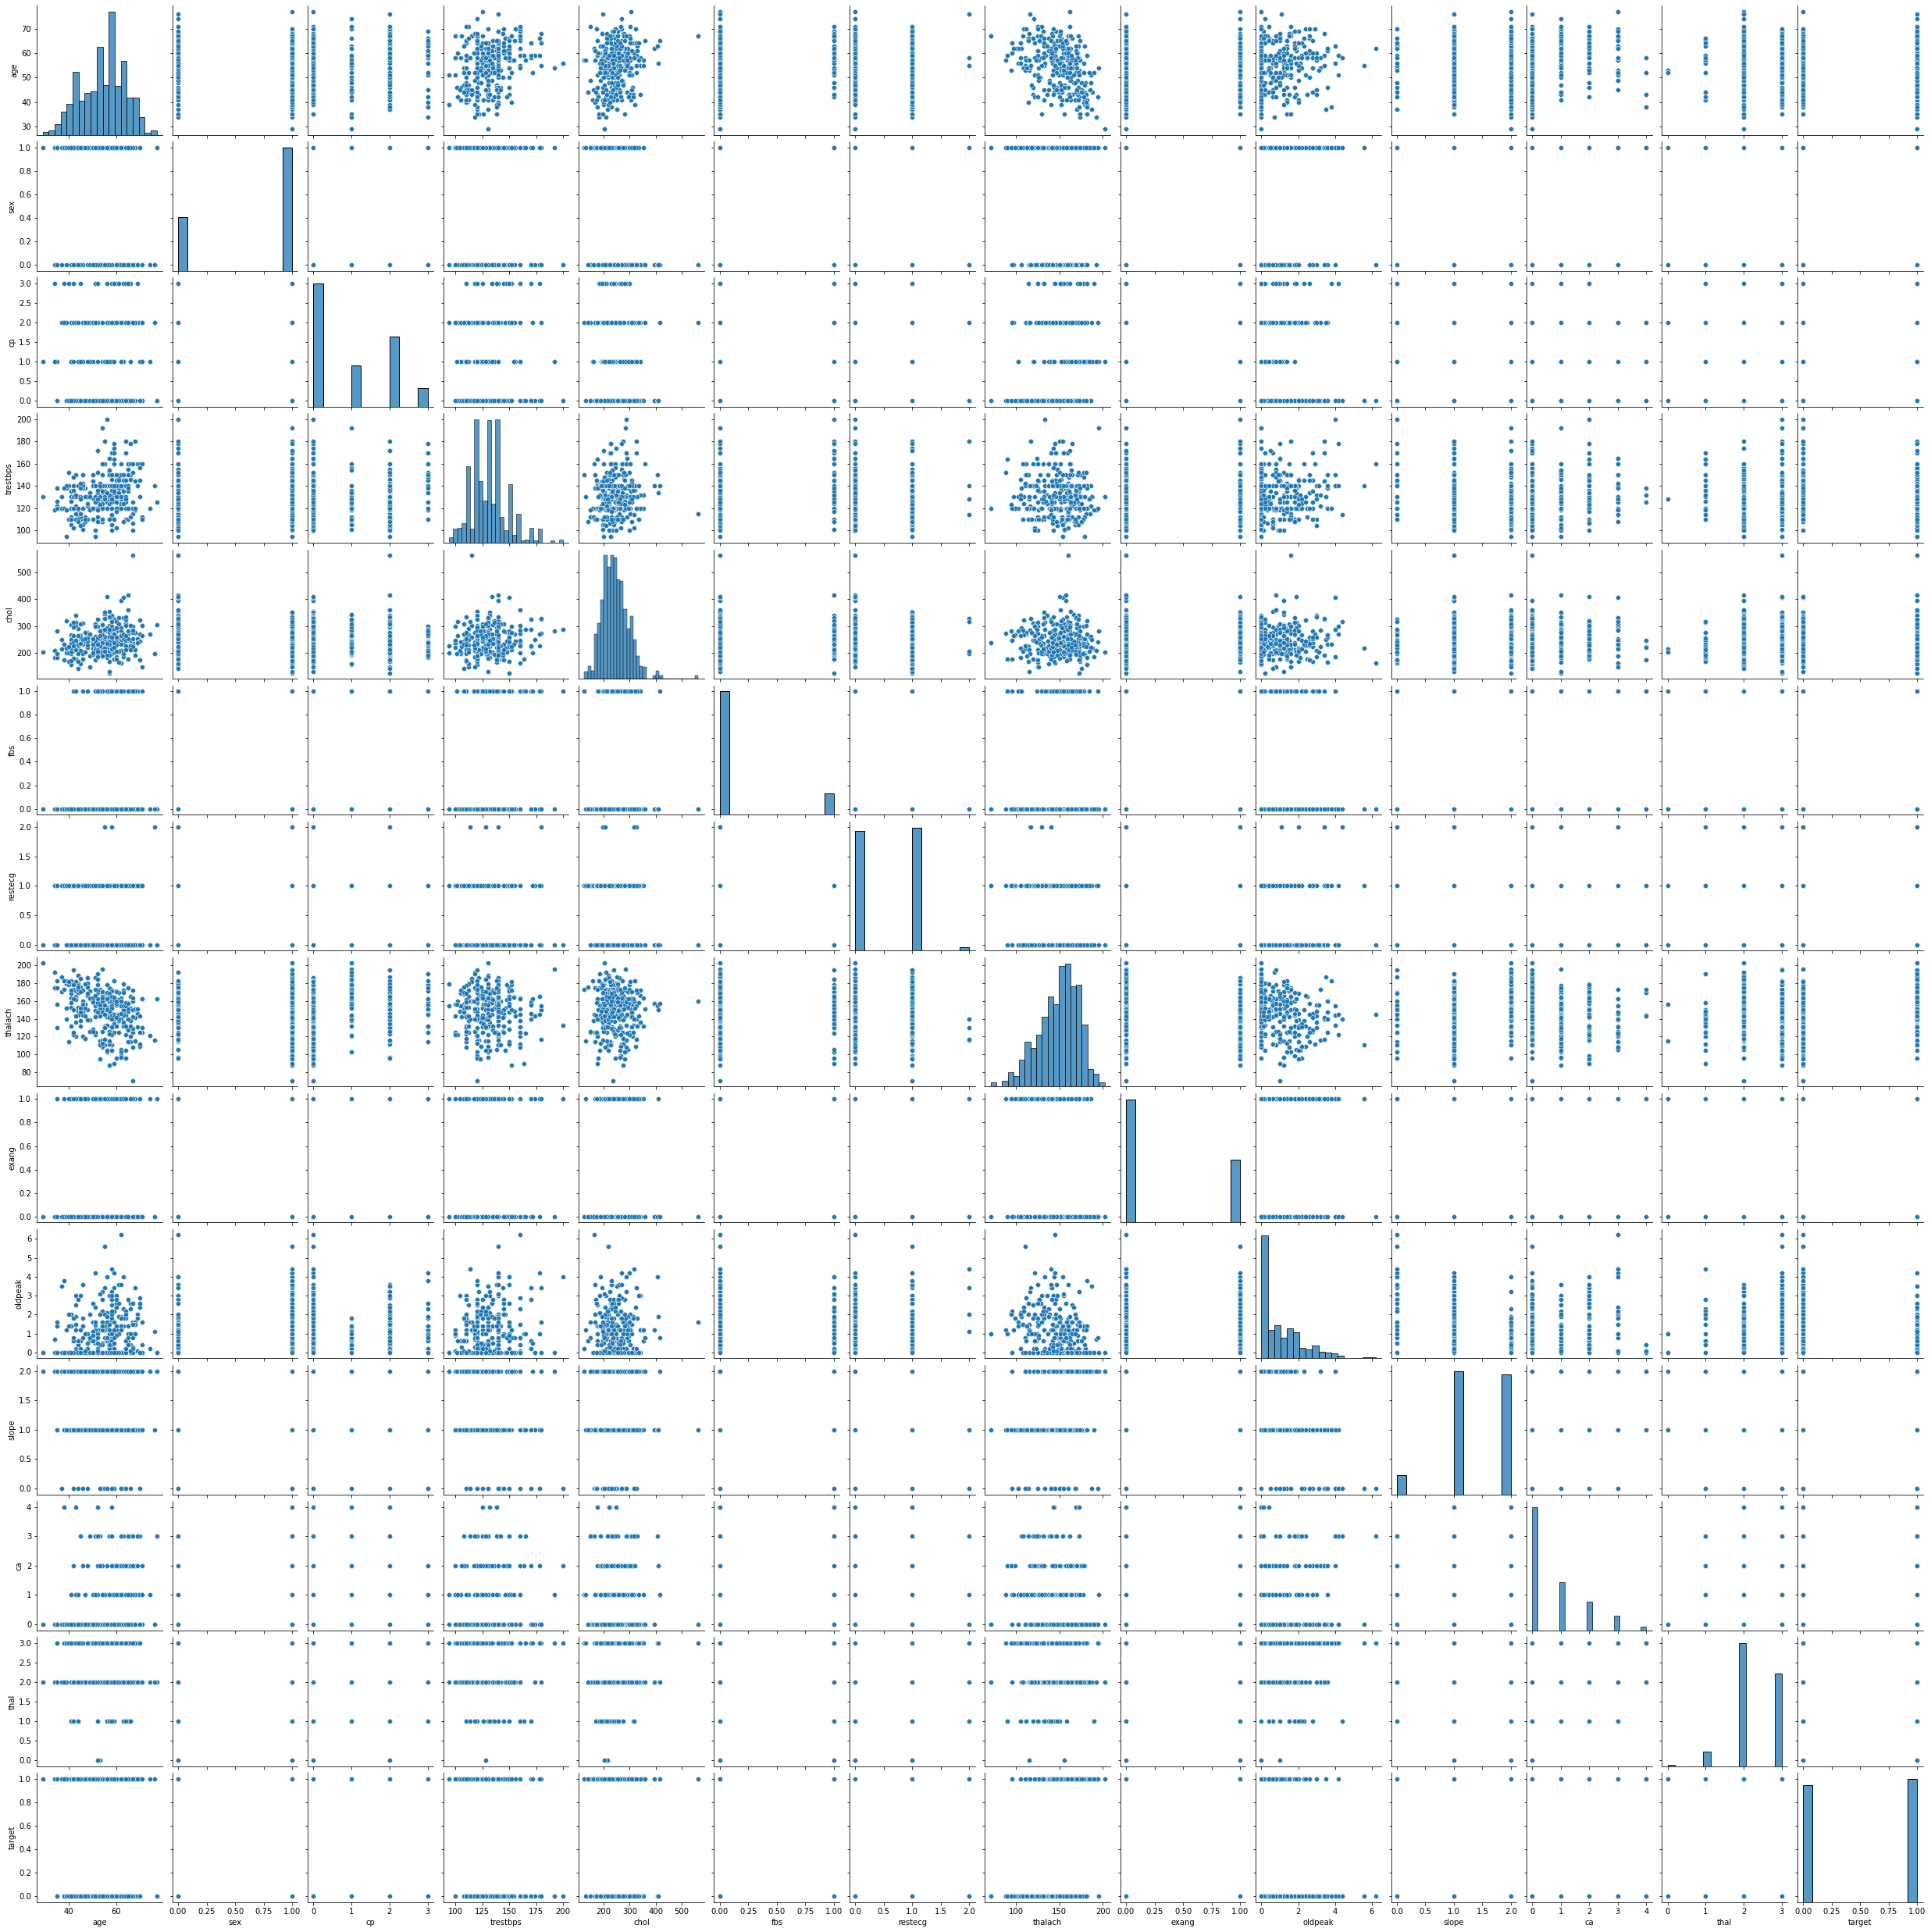

In [9]:
sns.pairplot(data)

In [36]:
full_train = pd.concat([X_train,y_train],axis=1)

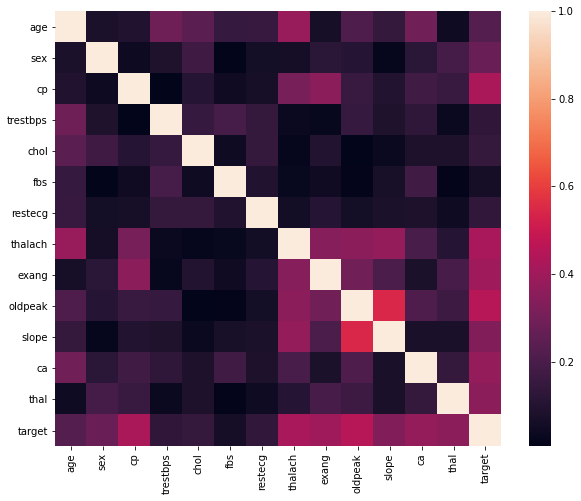

In [45]:
corr_matrix = full_train.corr()
plt.figure(figsize = (10,8))
ax = sns.heatmap(abs(corr_matrix))

In [46]:
# least correlated seem to be trestbps, chol, fbs
abs(corr_matrix['target'])

age         0.227771
sex         0.277964
cp          0.428609
trestbps    0.135250
chol        0.146110
fbs         0.063187
restecg     0.136207
thalach     0.419867
exang       0.397638
oldpeak     0.454164
slope       0.333139
ca          0.377184
thal        0.356088
target      1.000000
Name: target, dtype: float64

<AxesSubplot:xlabel='target', ylabel='count'>

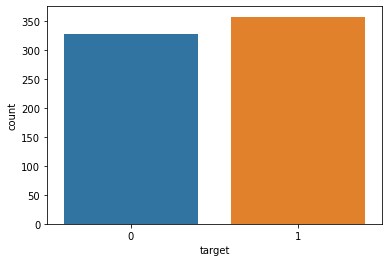

In [49]:
sns.countplot(data=full_train,x='target')

In [108]:
large_features = {'age','trestbps','chol','thalach','oldpeak'}
features = list(set(X_train.columns) - large_features)
large_features = list(large_features)

<ipython-input-100-dc46b9aea301>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


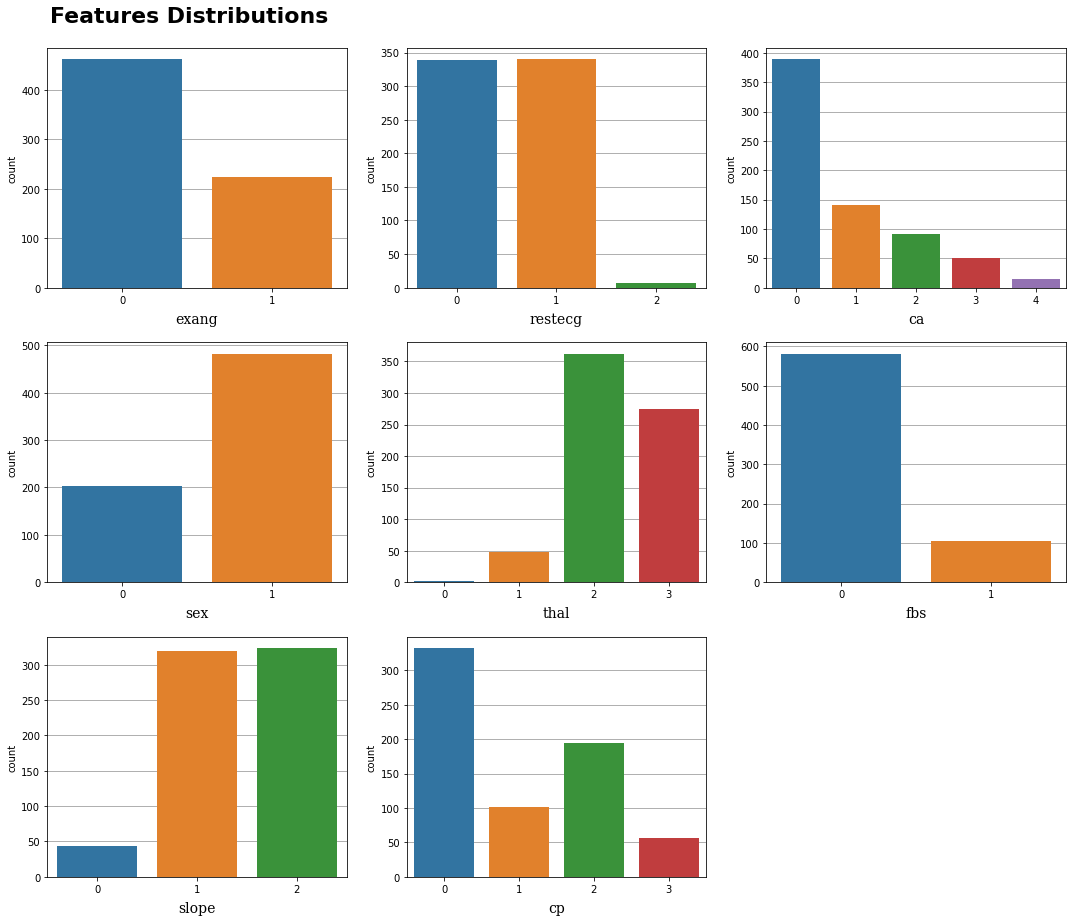

In [100]:
rows = 5
cols = 3
fig = plt.figure(figsize=(15, 20))
for index, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.countplot(x=feature, data=full_train, alpha=1, linewidth=1.5, zorder=2)
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)

fig.text(x=0.05, y=1.01, s="Features Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

<ipython-input-121-d5e57e261b33>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


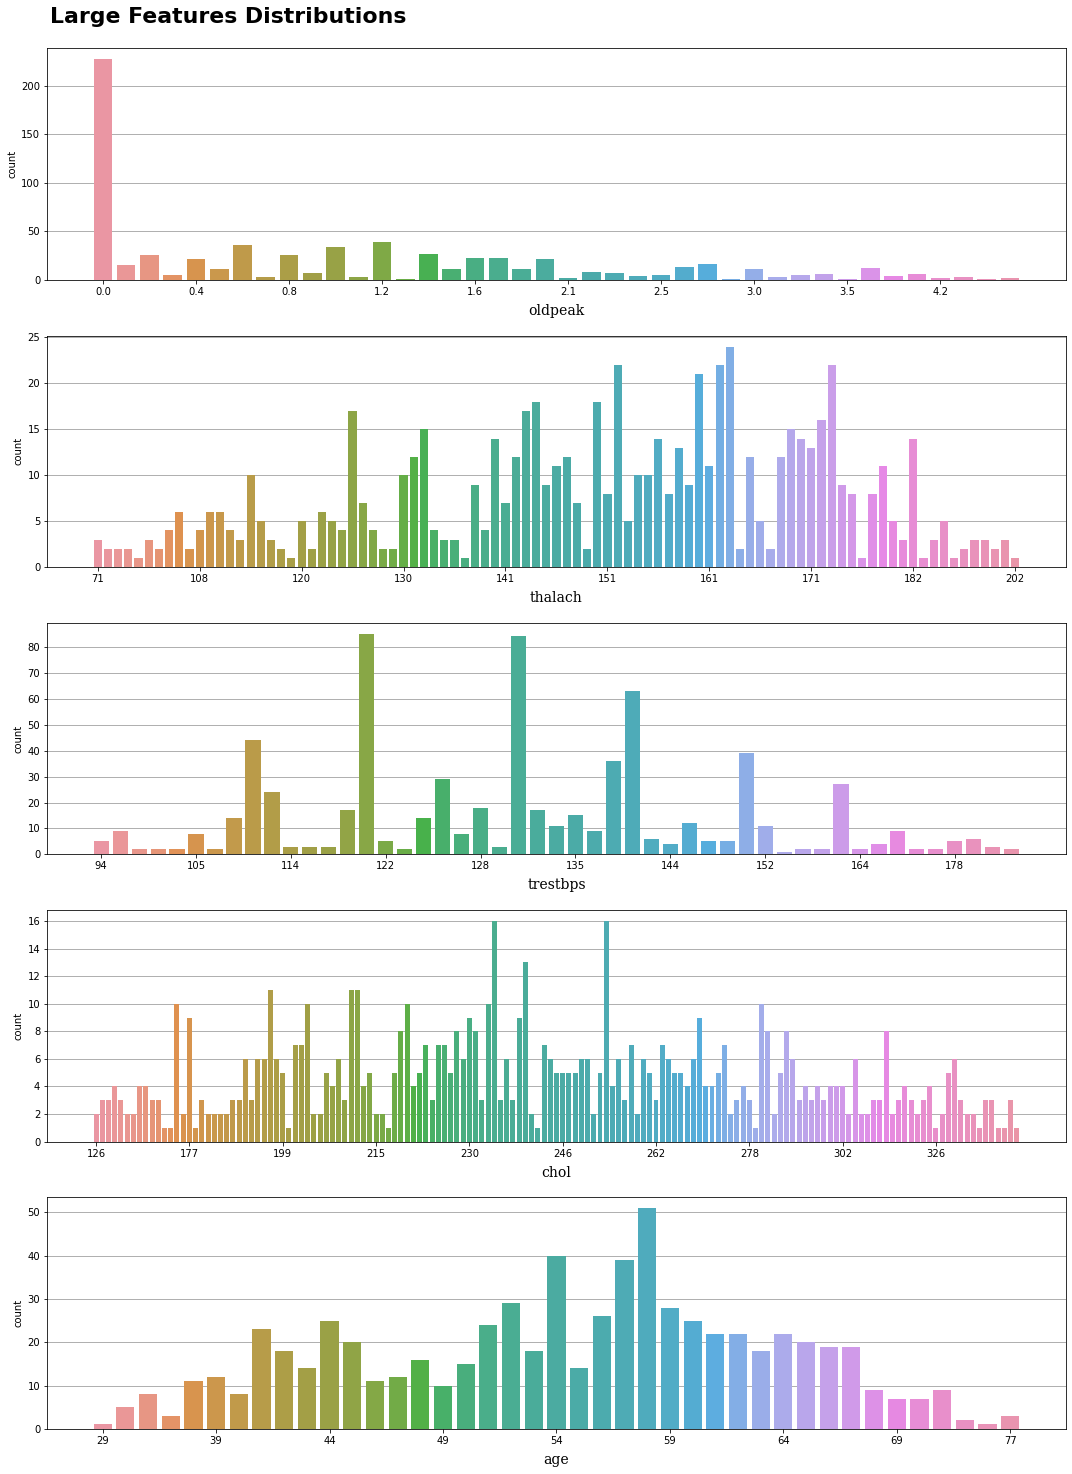

In [121]:
rows = 5
cols = 1
fig = plt.figure(figsize=(15, 20))
for index, feature in enumerate(large_features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.countplot(x=feature, data=full_train, alpha=1, linewidth=1.5, zorder=2)
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    ax.locator_params(axis='x', nbins=10)

fig.text(x=0.05, y=1.01, s="Large Features Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

<ipython-input-122-df763fe8bb6e>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


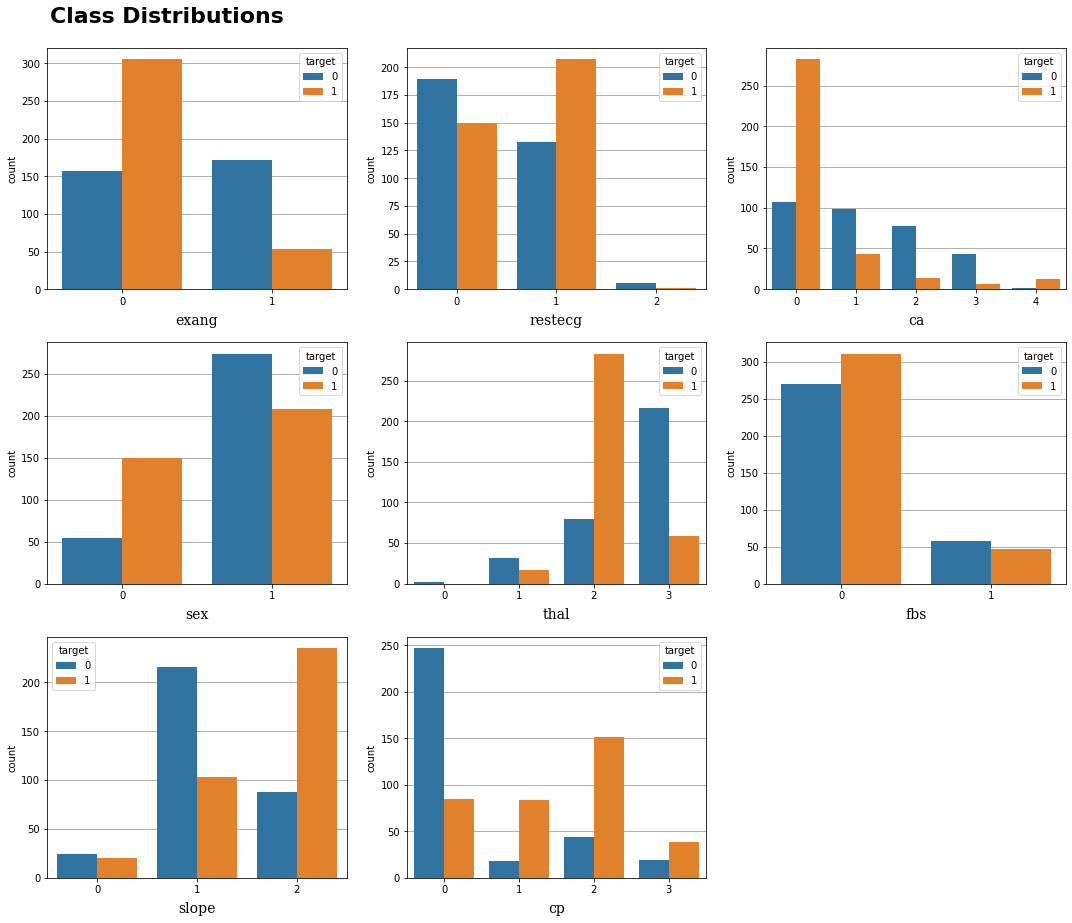

In [122]:
rows = 5
cols = 3
fig = plt.figure(figsize=(15, 20))
for index, feature in enumerate(features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.countplot(x=feature, data=full_train, alpha=1, linewidth=1.5, zorder=2,hue='target')
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)

fig.text(x=0.05, y=1.01, s="Class Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()

<ipython-input-124-3b82e605ebc2>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


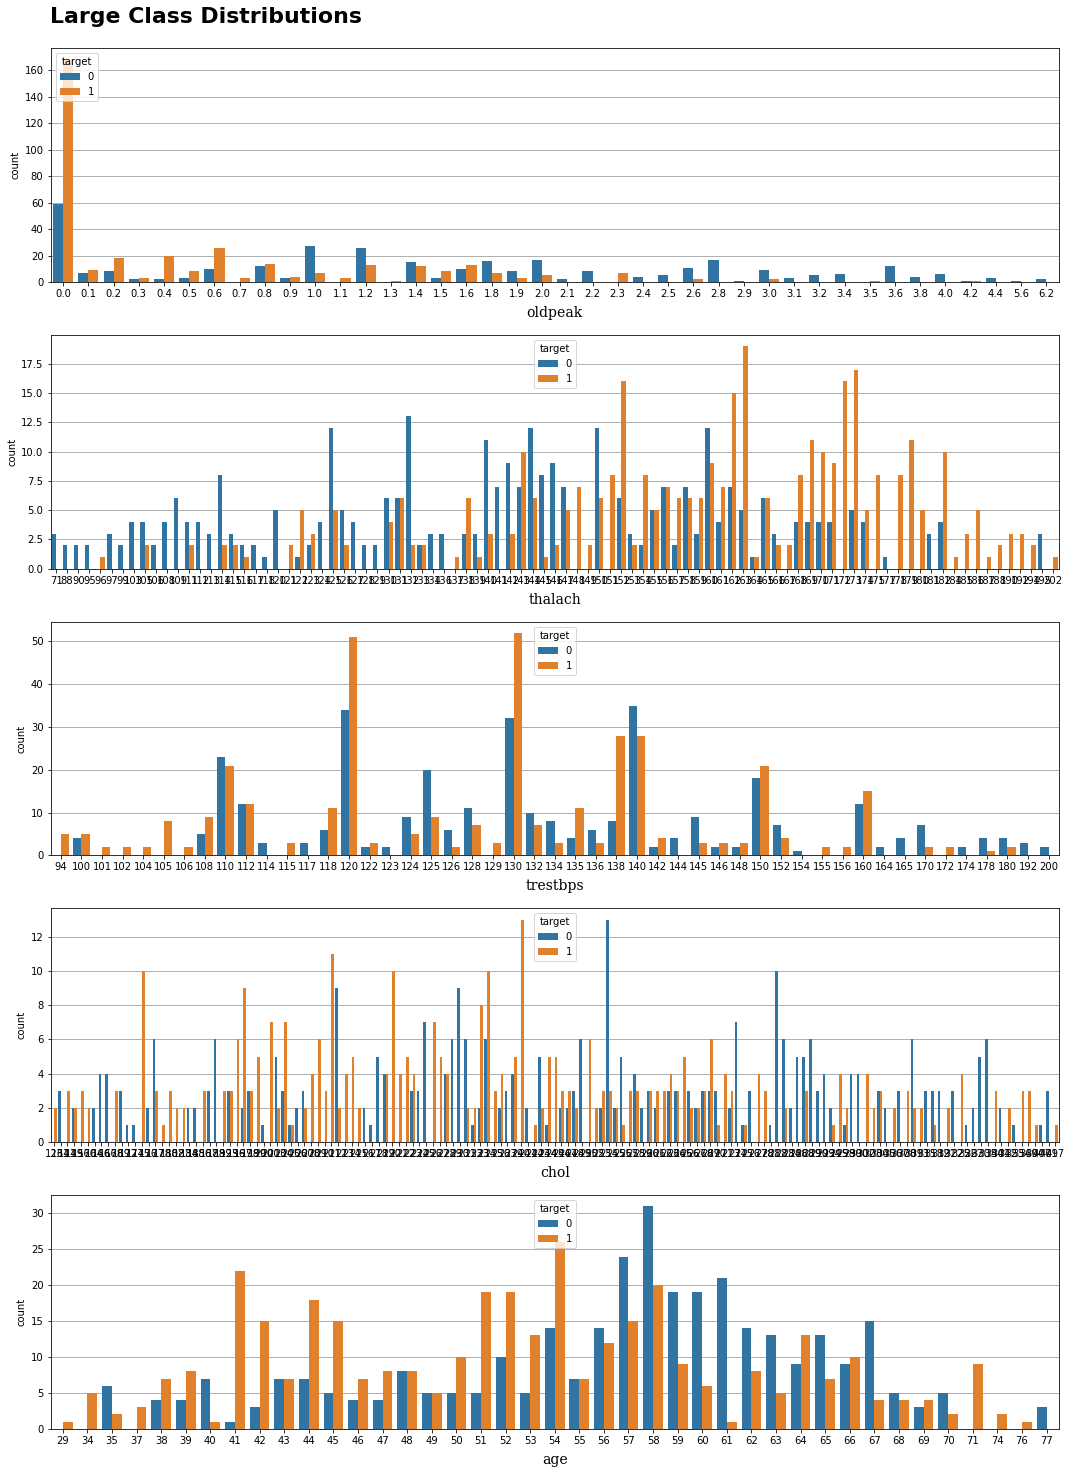

In [124]:
rows = 5
cols = 1
fig = plt.figure(figsize=(15, 20))
for index, feature in enumerate(large_features):
    ax = fig.add_subplot(rows, cols, index+1)
    ax.grid(axis="y", linewidth=1, zorder=0)
    sns.countplot(x=feature, data=full_train, alpha=1, linewidth=1.5, zorder=2,hue='target')
    ax.set_xlabel(feature, fontsize=14, fontfamily="serif", labelpad=7)
    ax.locator_params(axis='x', nbins=10)

fig.text(x=0.05, y=1.01, s="Large Class Distributions", fontsize=22, fontweight="bold")
fig.tight_layout(w_pad=2, h_pad=1.5)
fig.show()